In [1]:
import wrangle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
# train test split from sklearn
from sklearn.model_selection import train_test_split

# Scaling lesson exercises
Do your work for these exercises in a jupyter notebook named scaling. Use the zillow dataset you acquired and prepped in previous lesson. 

In [2]:
df = wrangle.get_zillow()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 115.0 MB


In [4]:
df = wrangle.wrangle_zillow(df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2068415 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    uint8  
 1   bathroomcnt                   float16
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     uint16 
 5   taxamount                     float64
 6   fips                          uint16 
dtypes: float16(1), float64(3), uint16(2), uint8(1)
memory usage: 76.9 MB


#### Exercise 1: Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [6]:
def split_zillow(df):
    '''
    Takes in a prepped zillow dataframe, splits it into train, validate and test subgroups and then returns those subgroups.
    
    Arguments: df - a cleaned pandas dataframe with the expected feature names and columns in the zillow dataset
    Return: train, validate, test - dataframes ready for the exploration and model phases.
    '''
    train, test = train_test_split(df, train_size = 0.8, random_state = 1234)
    train, validate = train_test_split(train, train_size = 0.7, random_state = 1234)
    return train, validate, test

In [7]:
train, validate, test = split_zillow(df)

In [8]:
train.shape, validate.shape, test.shape

((1158312, 7), (496420, 7), (413683, 7))

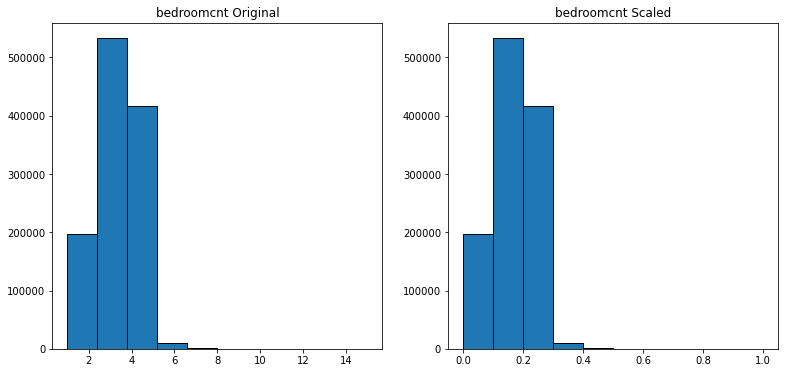

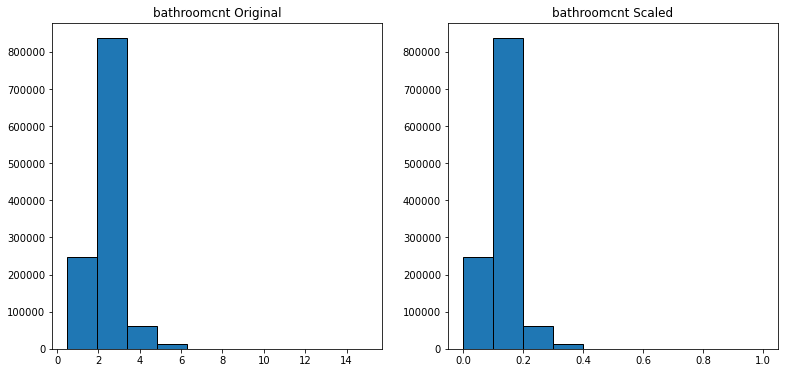

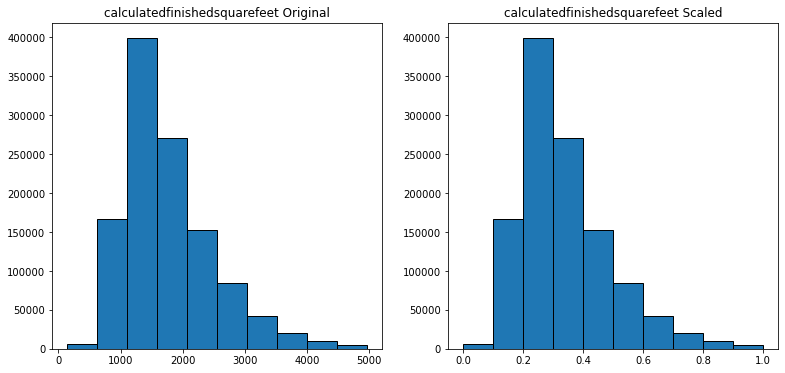

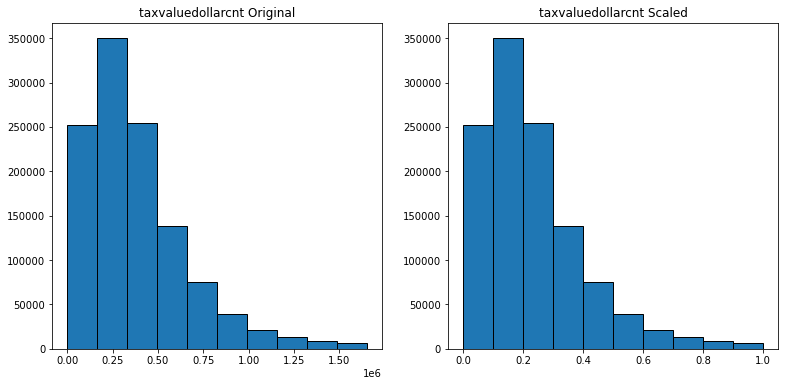

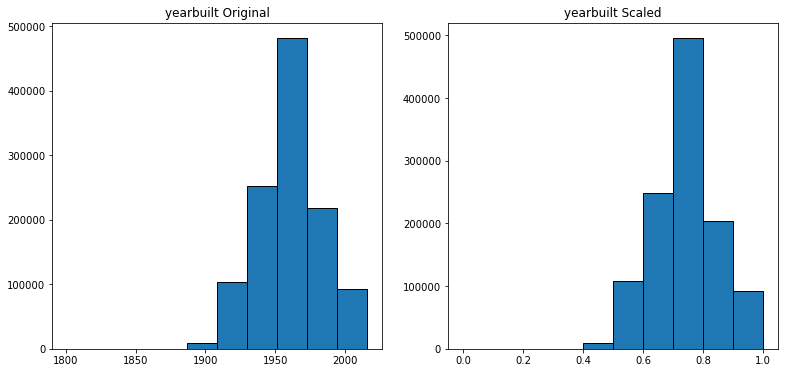

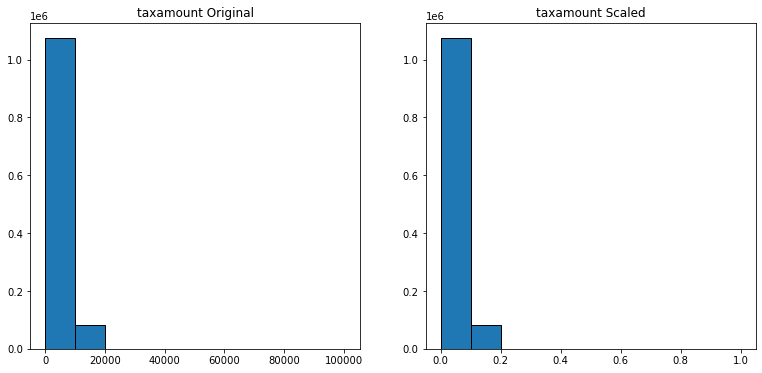

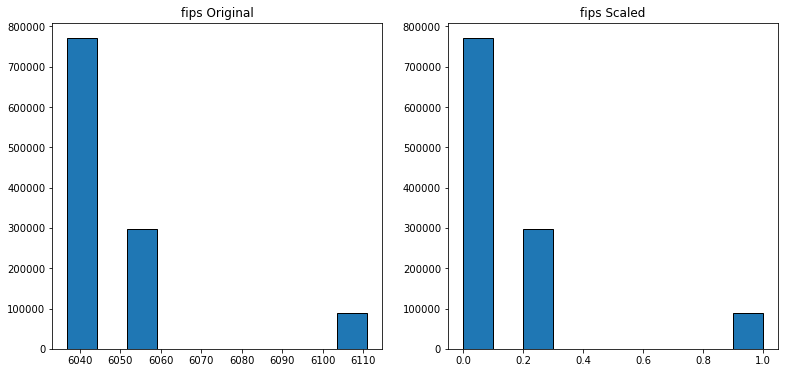

In [10]:
scaler = MinMaxScaler()

for column in train.columns:
    min_max_scaled = scaler.fit_transform(np.array(train[column]).reshape(-1,1))
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(train[column], ec='black')
    plt.title(f'{column} Original')
    plt.subplot(122)
    plt.hist(min_max_scaled, ec='black')
    plt.title(f'{column} Scaled')

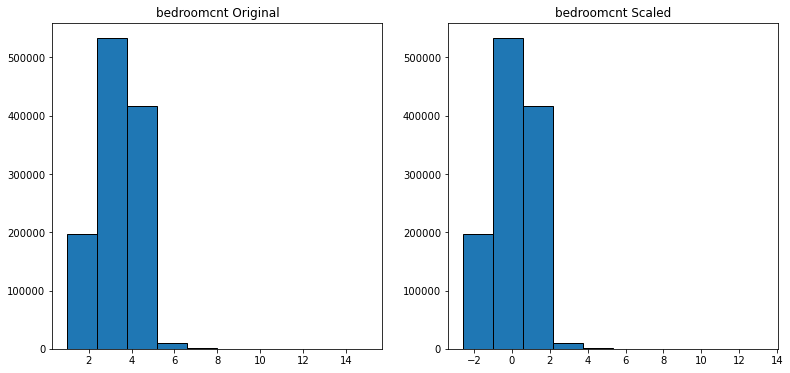

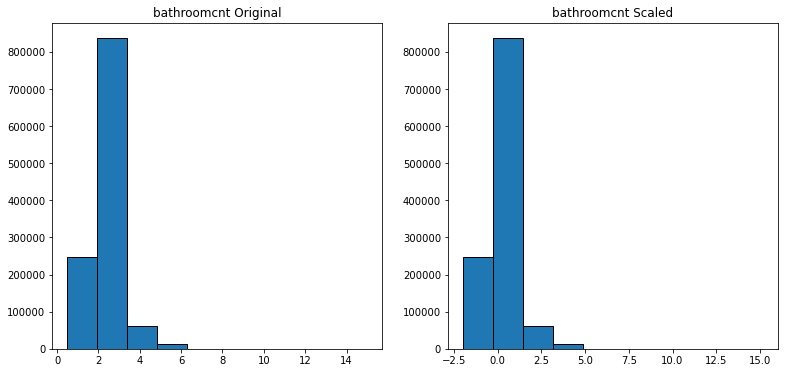

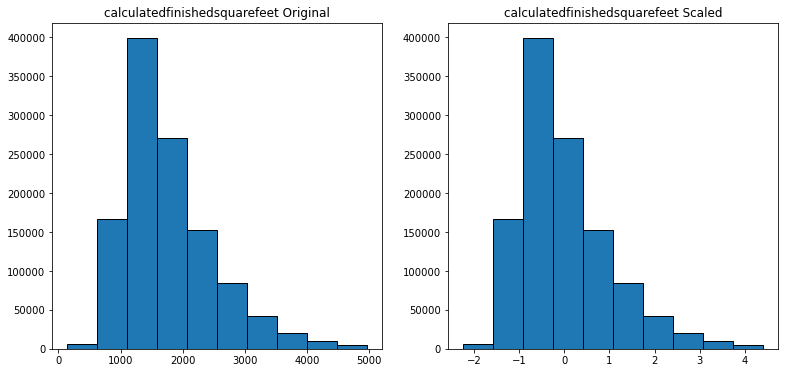

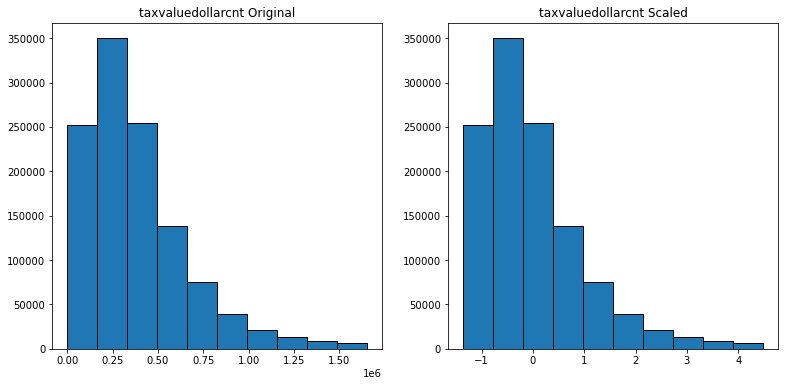

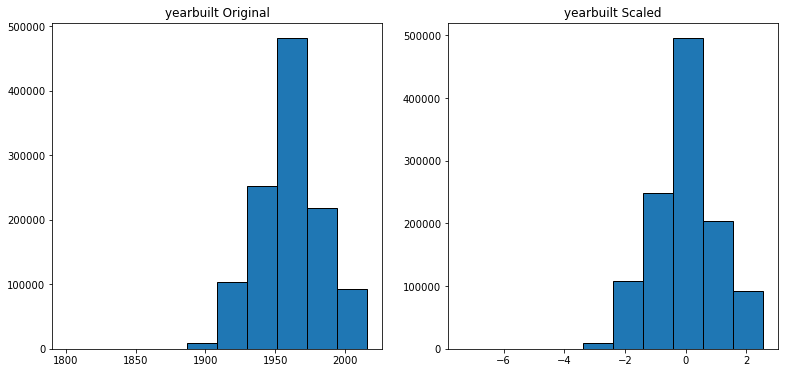

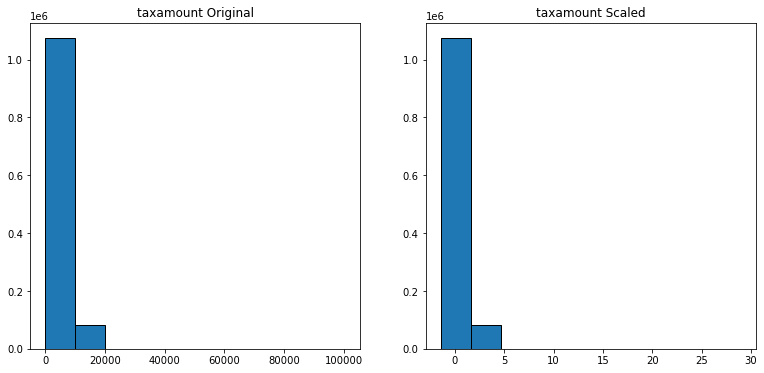

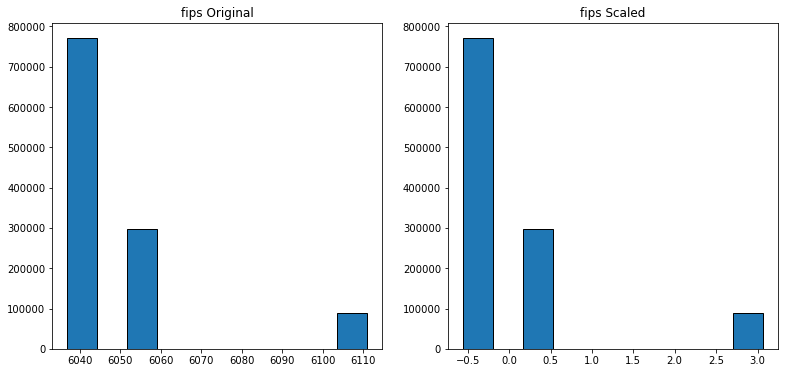

In [13]:
scaler = StandardScaler()

for column in train.columns:
    standard_scaled = scaler.fit_transform(np.array(train[column]).reshape(-1,1))
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(train[column], ec='black')
    plt.title(f'{column} Original')
    plt.subplot(122)
    plt.hist(standard_scaled, ec='black')
    plt.title(f'{column} Scaled')

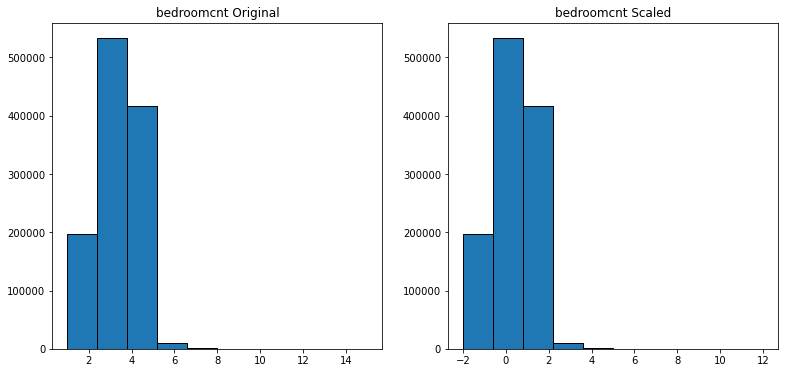

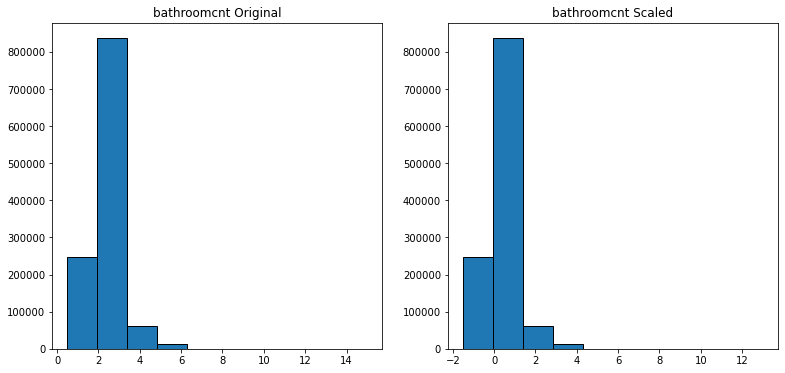

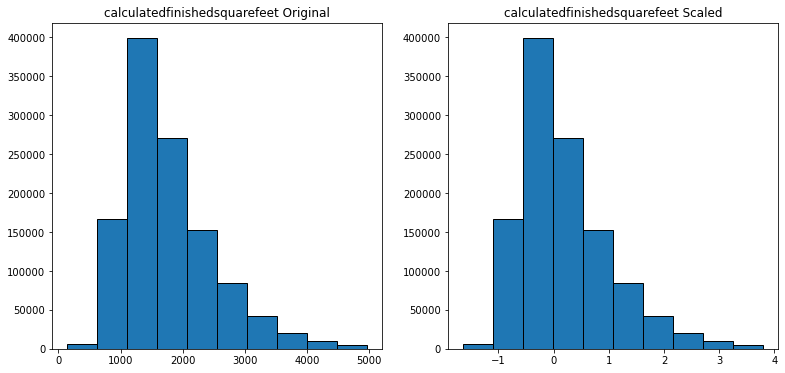

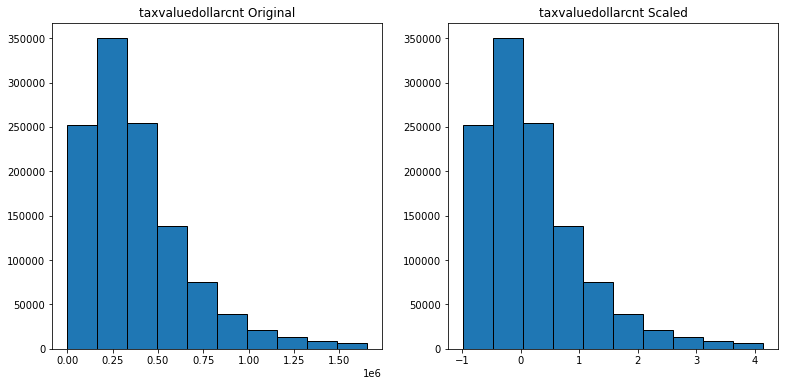

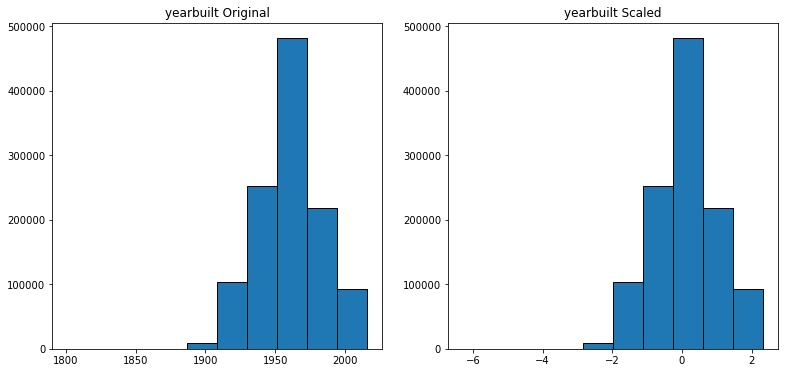

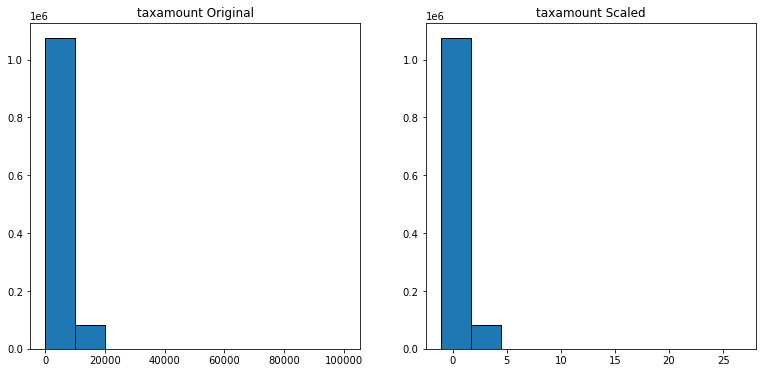

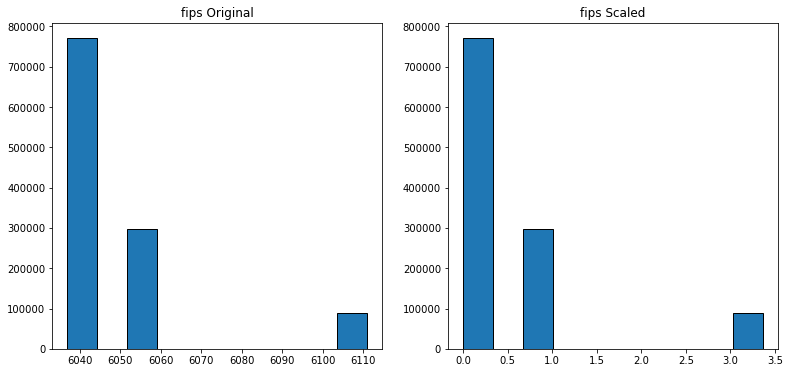

In [12]:
scaler = RobustScaler()

for column in train.columns:
    robust_scaled = scaler.fit_transform(np.array(train[column]).reshape(-1,1))
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(train[column], ec='black')
    plt.title(f'{column} Original')
    plt.subplot(122)
    plt.hist(robust_scaled, ec='black')
    plt.title(f'{column} Scaled')

#### Exercise 2: Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [18]:
MinMaxScaler.inverse_transform(min_max_scaled)

TypeError: inverse_transform() missing 1 required positional argument: 'X'

#### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [19]:
from sklearn.preprocessing import QuantileTransformer

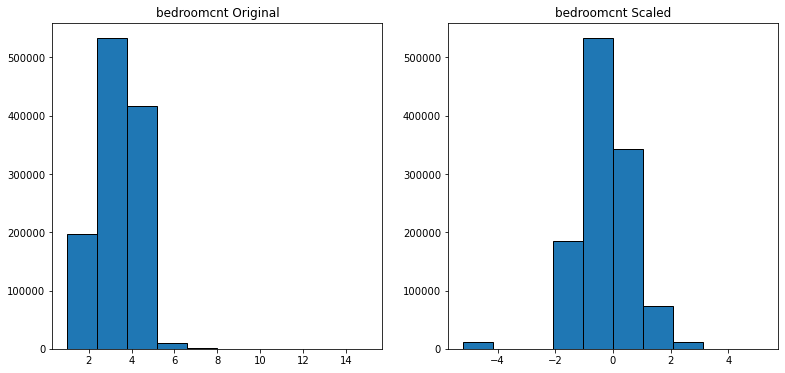

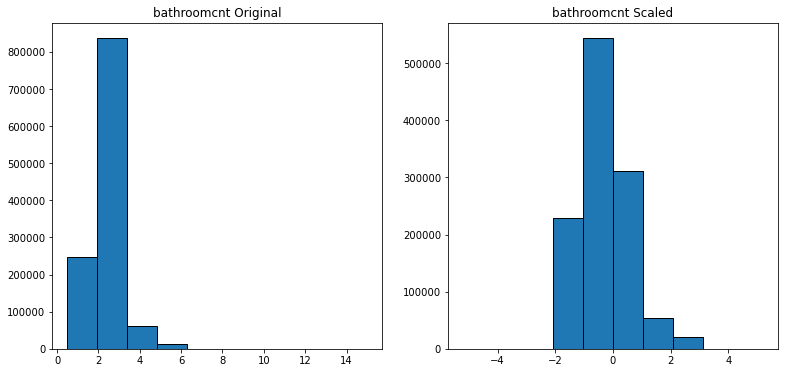

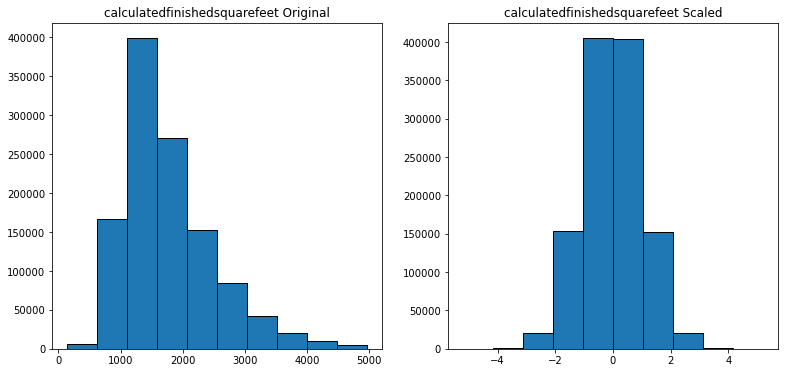

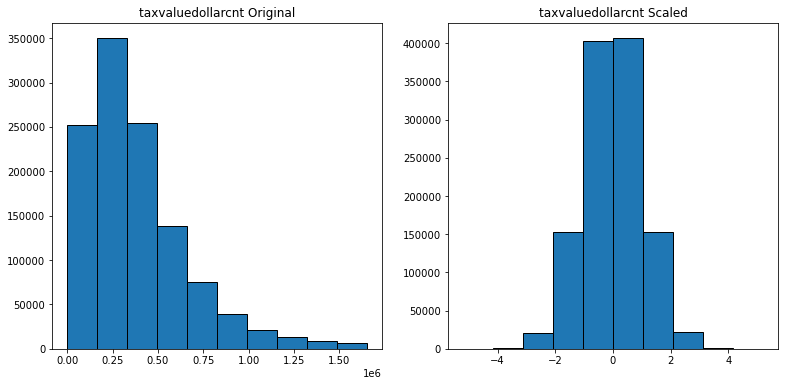

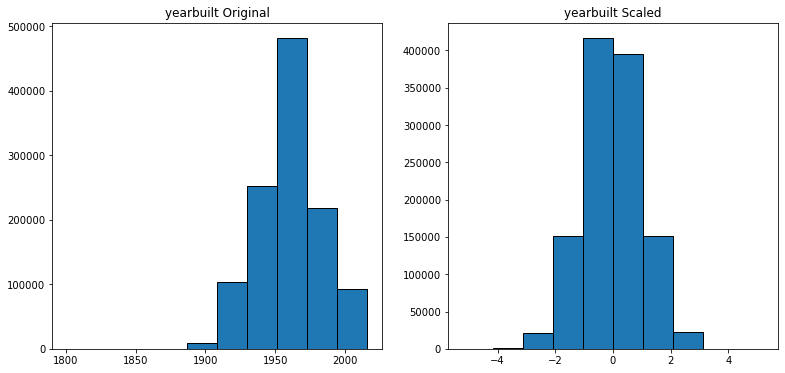

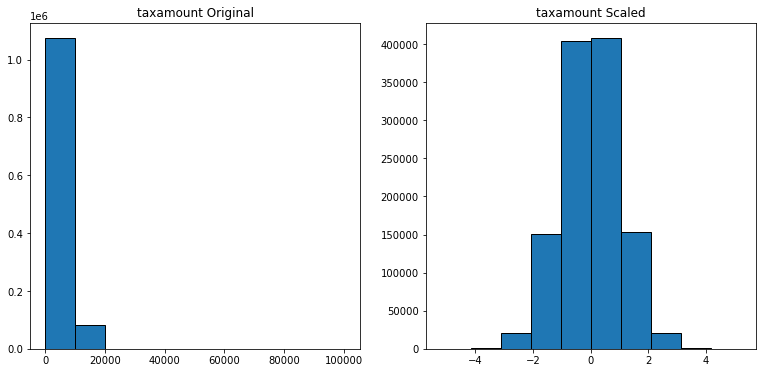

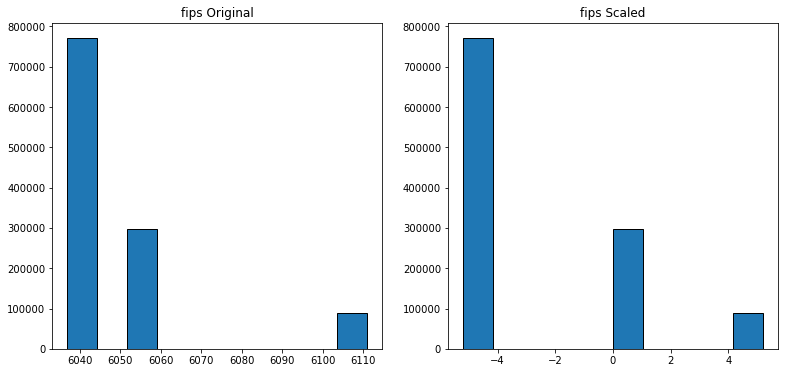

In [21]:
qt = QuantileTransformer(output_distribution='normal')

for column in train.columns:
    robust_scaled = qt.fit_transform(np.array(train[column]).reshape(-1,1))
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(train[column], ec='black')
    plt.title(f'{column} Original')
    plt.subplot(122)
    plt.hist(robust_scaled, ec='black')
    plt.title(f'{column} Scaled')

#### Exercise 4: Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

I notice it's making the data as uniform as possible.

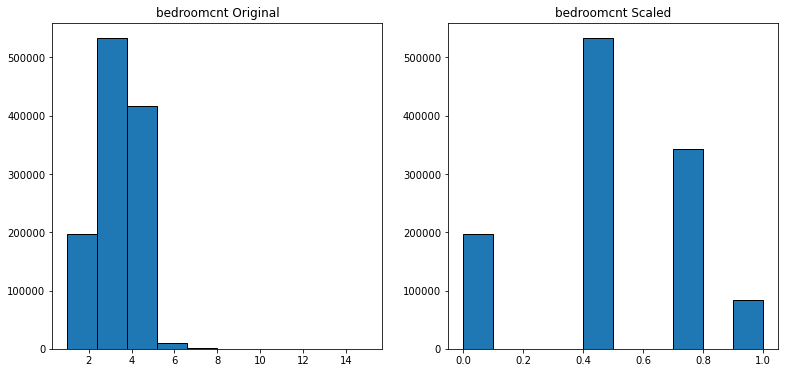

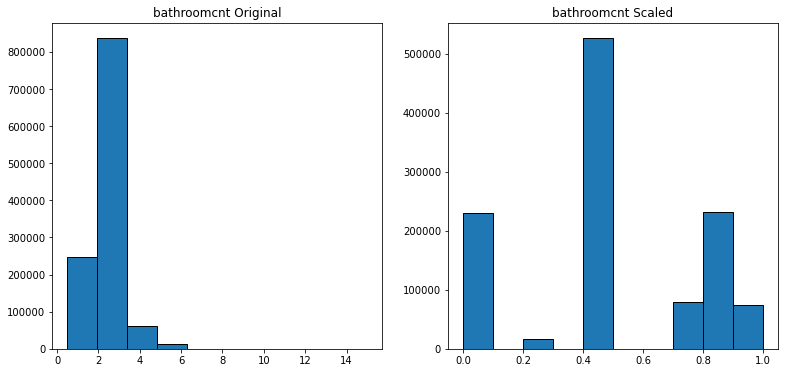

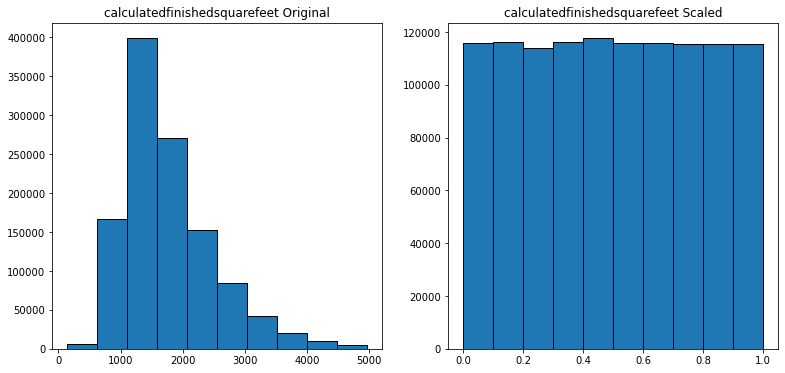

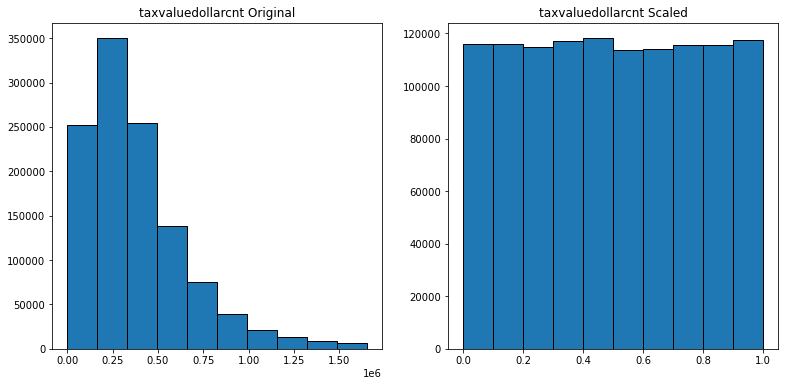

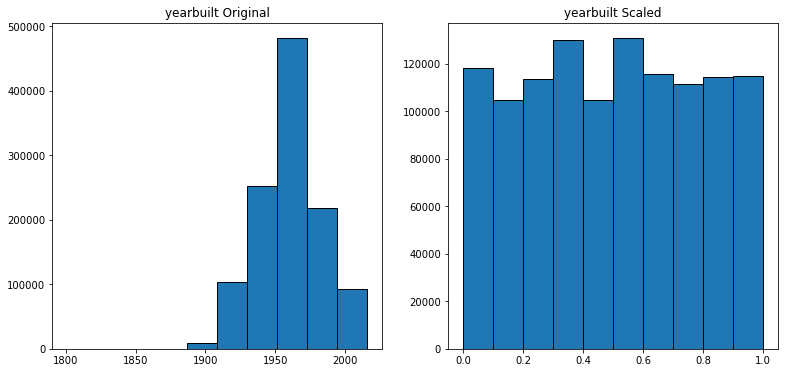

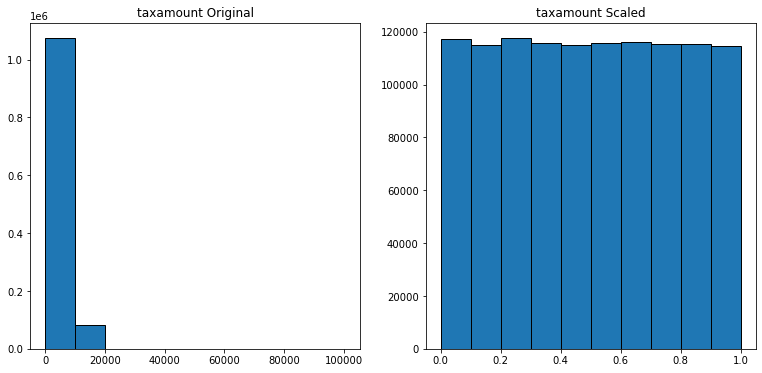

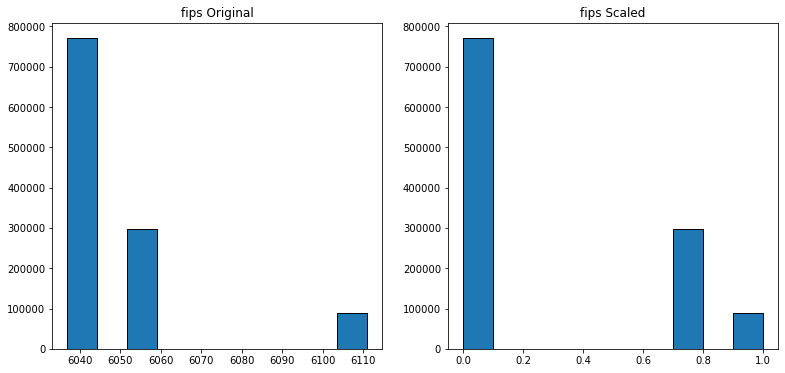

In [23]:
qt = QuantileTransformer()

for column in train.columns:
    robust_scaled = qt.fit_transform(np.array(train[column]).reshape(-1,1))
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(train[column], ec='black')
    plt.title(f'{column} Original')
    plt.subplot(122)
    plt.hist(robust_scaled, ec='black')
    plt.title(f'{column} Scaled')

#### Exercise 5: Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

Based on the work I've done here, I'm going to go with a min_max scaling method for my Zillow dataset. It is the simplest and should work fine for my dataset since I've already dealt with outliers and other problematic data.